No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


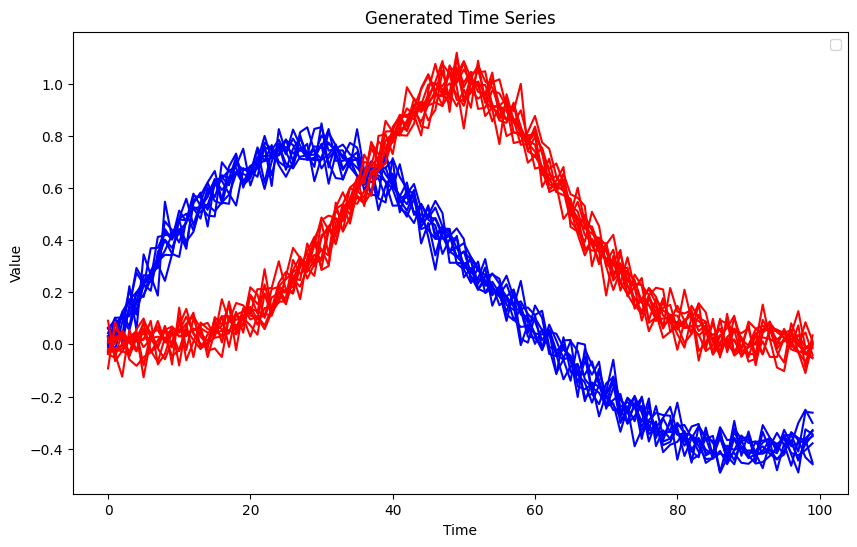

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры временных рядов
num_samples = 100  # Количество точек в каждом ряде
num_classes = 2  # Количество классов
num_series_per_class = 10  # Количество рядов в каждом классе

def generate_time_series_class1():
    x = np.linspace(0, 10, num_samples)  # Генерируем значения x от 0 до 10
    base_pattern = np.sin(0.5 * x) * np.exp(-0.1 * x)  # Базовый паттерн для первого класса
    variation = np.random.normal(0, 0.05, num_samples)  # Генерируем случайную вариацию для каждого ряда
    series = base_pattern + variation  # Комбинируем базовый паттерн и вариацию для создания временного ряда
    return series

def generate_time_series_class2():
    x = np.linspace(0, 10, num_samples)
    base_pattern = np.exp(-(x - 5) ** 2 / 4)  # Гауссова функция для второго класса
    variation = np.random.normal(0, 0.05, num_samples)
    series = base_pattern + variation
    return series

data = []
labels = []

for i in range(10):
    series_class1 = generate_time_series_class1()
    data.append(series_class1)
    labels.append(0)
for i in range(10, 21):
    series_class2 = generate_time_series_class2()
    data.append(series_class2)
    labels.append(1)

# Визуализируем ряды
plt.figure(figsize=(10, 6))
colors = ["blue", "red"]  # Цвета для каждого класса
for series, label in zip(data, labels):
    plt.plot(series, color=colors[label])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Generated Time Series")
plt.show()


In [29]:
def generate_candidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

In [30]:
def find_distances(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [31]:
def assess_candidate(S, DS):
    quality = np.mean(np.sqrt(DS))
    return quality

In [32]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

In [33]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result

In [34]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result

In [39]:
def shapelet_selection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generate_candidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = find_distances(candidate, candidates)
                quality = assess_candidate(candidate, distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean

myseed = 7
random.seed(myseed)
np.random.seed(myseed)

In [45]:
K_shapletes_1 = shapelet_selection(data[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_2 = shapelet_selection(data[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_1)
print(K_shapletes_2)

[(array([-0.33766306, -0.36720021, -0.43325896, -0.45953326]), 1.0053672398743365), (array([-0.41697731, -0.40658857, -0.40856979, -0.37711318]), 0.9990645731729221), (array([0.79325459, 0.72949052, 0.68079675, 0.84773419]), 0.9962270828459132), (array([-0.36426067, -0.41697731, -0.40658857, -0.40856979]), 0.9950381127543438), (array([-0.42127766, -0.33766306, -0.36720021, -0.43325896]), 0.9943559549605707), (array([-0.40703773, -0.3589969 , -0.40368101, -0.42151302]), 0.9940286882641048), (array([-0.40368101, -0.42151302, -0.31763546, -0.36702972]), 0.987852770574987), (array([-0.40658857, -0.40856979, -0.37711318, -0.35872801]), 0.9872419568058501), (array([-0.3589969 , -0.40368101, -0.42151302, -0.31763546]), 0.9861951584804086), (array([-0.36702972, -0.36426067, -0.41697731, -0.40658857]), 0.9848750185593483), (array([-0.38821083, -0.42127766, -0.33766306, -0.36720021]), 0.9834279387717288), (array([-0.37711318, -0.35872801, -0.38821083, -0.42127766]), 0.9822772629276598), (array([

In [46]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_1 + K_shapletes_2

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]  
    x.append(res)
    
    if i < len(K_shapletes_1):
        Y.append(0)
    else:
        Y.append(1)

X_train = []
X_test = []
Y_train = []
Y_test = []
print(shpletes_qual)

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    Y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    Y_test.append(Y[indexes[i] - 1])

Y_train, Y_test

[(array([-0.33766306, -0.36720021, -0.43325896, -0.45953326]), 1.0053672398743365), (array([-0.41697731, -0.40658857, -0.40856979, -0.37711318]), 0.9990645731729221), (array([0.79325459, 0.72949052, 0.68079675, 0.84773419]), 0.9962270828459132), (array([-0.36426067, -0.41697731, -0.40658857, -0.40856979]), 0.9950381127543438), (array([-0.42127766, -0.33766306, -0.36720021, -0.43325896]), 0.9943559549605707), (array([-0.40703773, -0.3589969 , -0.40368101, -0.42151302]), 0.9940286882641048), (array([-0.40368101, -0.42151302, -0.31763546, -0.36702972]), 0.987852770574987), (array([-0.40658857, -0.40856979, -0.37711318, -0.35872801]), 0.9872419568058501), (array([-0.3589969 , -0.40368101, -0.42151302, -0.31763546]), 0.9861951584804086), (array([-0.36702972, -0.36426067, -0.41697731, -0.40658857]), 0.9848750185593483), (array([-0.38821083, -0.42127766, -0.33766306, -0.36720021]), 0.9834279387717288), (array([-0.37711318, -0.35872801, -0.38821083, -0.42127766]), 0.9822772629276598), (array([

([0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1],
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [47]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest()
clf.fit(X_train, Y_train)

print("Классификатор TimeSeriesForest \n")
print(f"Accuracy = {clf.score(X_test, Y_test)}")
for i in range(len(X_test)):
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(np.array(X_test[i]).reshape(1, -1))[0]}")
    print(f"Истинный класс для предсказаний {Y_test[i]}\n")

--- Классификатор TimeSeriesForest ---

Accuracy = 1.0
Вектор вероятности принадлежности к классам [1. 0.]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [0.002 0.998]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [1. 0.]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [0.834 0.166]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [1. 0.]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [0. 1.]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [0. 1.]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [1. 0.]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [0. 1.]
Истинный класс для предсказаний 1

Вектор вероятности принадлежности к классам [1. 0.]
Истинный класс для предсказаний 0

Вектор вероятности принадлежности к классам [1. 0.]
Истинный кл